In [ ]:
#Import the libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load the data set
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
d1, d2, d3 = train_images.shape
train_images = train_images.reshape((d1, d2*d3))
train_images = np.array(train_images)
m, n = train_images.shape
print(m,n)

dataimg_dev = train_images[0:1000].T
datalbl_dev = train_labels[0:1000].T
Y_dev = datalbl_dev
X_dev = dataimg_dev[0:n]
X_dev = X_dev/255.

dataimg_train = train_images[1000:m].T
datalbl_train = train_labels[1000:m].T
Y_train = datalbl_train
X_train = dataimg_train[0:n]
X_train = X_train / 255.

print(X_train.shape)

60000 784
(784, 59000)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [ ]:
def forward_prop(X,W1,b1,W2,b2):
  Z1 = np.dot(W1,X) + b1
  A1 = tf.nn.sigmoid(Z1)
  Z2 = np.dot(W2,A1) + b2
  A2 = tf.nn.sigmoid(Z2)
  return Z1, A1, Z2, A2

In [ ]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [ ]:
def backward_prop(Z1,Z2,A1,A2,W1,W2,b1,b2,X,Y):
  l = one_hot(Y)
  dCa = 2*(A2 - l)
  j = dCa * (1 - tf.nn.sigmoid(Z2)) * tf.nn.sigmoid(Z2)
  dW2 = 1 / m * np.dot(j,np.transpose(A1))
  db2 = 1 / m * j
  k = np.dot(np.transpose(W2),j) * ((1 - tf.nn.sigmoid(Z1)) * tf.nn.sigmoid(Z1))
  dW1 = 1 / m * np.dot(k,np.transpose(X))
  db1 = 1 / m * k
  return dW1, db1, dW2, db2

In [ ]:
def update_parameters(W1,b1,W2,b2,dW1,db1,dW2,db2,lr):
  W1-=lr * dW1
  b1-=lr * db1
  W2-=lr * dW2
  b2-=lr * db2
  return W1,b1,W2,b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size

In [ ]:
def gradient_descent(X, Y, lr, iterations):
    W1, b1, W2, b2 = init_params()
    print(b1.shape)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_prop(Z1,Z2,A1,A2,W1,W2,b1,b2,X,Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 10000)


(10, 1)
Iteration:  0
[2 5 4 ... 4 5 4] [1 2 2 ... 3 0 5]
0.13147457627118644
Iteration:  10
[2 5 4 ... 4 5 5] [1 2 2 ... 3 0 5]
0.1187457627118644
Iteration:  20
[2 5 4 ... 4 5 5] [1 2 2 ... 3 0 5]
0.1198135593220339
Iteration:  30
[3 5 4 ... 4 2 5] [1 2 2 ... 3 0 5]
0.13708474576271187
Iteration:  40
[3 5 4 ... 4 2 5] [1 2 2 ... 3 0 5]
0.15357627118644068
Iteration:  50
[3 5 4 ... 4 2 5] [1 2 2 ... 3 0 5]
0.164
Iteration:  60
[3 5 8 ... 4 2 5] [1 2 2 ... 3 0 5]
0.1791864406779661
Iteration:  70
[3 5 8 ... 4 2 5] [1 2 2 ... 3 0 5]
0.19510169491525423
Iteration:  80
[3 5 8 ... 4 1 5] [1 2 2 ... 3 0 5]
0.2115593220338983
Iteration:  90
[3 5 8 ... 3 1 5] [1 2 2 ... 3 0 5]
0.22628813559322034
Iteration:  100
[3 5 8 ... 3 1 5] [1 2 2 ... 3 0 5]
0.23961016949152542
Iteration:  110
[3 5 8 ... 3 1 5] [1 2 2 ... 3 0 5]
0.25154237288135595
Iteration:  120
[3 5 8 ... 3 1 5] [1 2 2 ... 3 0 5]
0.26149152542372883
Iteration:  130
[3 5 3 ... 3 1 5] [1 2 2 ... 3 0 5]
0.2719491525423729
Iteration:  14

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(X,W1,b1,W2,b2)
    predictions = get_predictions(A2)
    return predictions

def train_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_dev[:, index, None]
    prediction = make_predictions(X_dev[:, index, None], W1, b1, W2, b2)
    label = Y_dev[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5 5 5 ... 5 5 5]
Label:  5


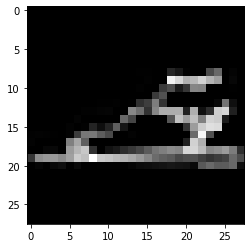

In [ ]:
test_prediction(300, W1, b1, W2, b2)